# 放物運動

- 現実の現象のかなりの部分ば連立微分方程式で表現される
- どうプログラミングに落とし込むか？ → ごく小さな変化に関する方程式で近似する（差分化）

## 基本的な放物運動シミュレーション

In [2]:
# x方向には力はかかっておらず、y軸負方向に重力で落下している
def parabolic_m_step(y, x, vel_y, vel_x, stride):
    g = 9.8
    y = y + vel_y * stride
    x = x + vel_x * stride
    vel_y = vel_y - g * stride
    return [y, x, vel_y, vel_x]

In [8]:
# 差分化して立てた式（Δ時間あたりの変化）を繰り返し利用し、数秒後の変化を求める
def parabolic_motion(y, x, vel_y, vel_x):
    stride = 0.3
    current = [y, x, vel_y, vel_x]
    for i in range(0, 100):
        current = parabolic_m_step(current[0], current[1], current[2], current[3], stride)
    return current

テスト

In [9]:
parabolic_motion(10, 10, 2, 1)

[-4295.899999999998, 39.99999999999998, -291.99999999999983, 1]

### 問題点
- 計算結果を見ても、数値がわかるだけで正しいかどうかわからない
- 結果のy座標が負になることがあり、地面にのめり込んでいるイメージがある
- シミュレーションのありがたみがない
- current[0]、[1]がぞれぞれ何を表しているのか、わかりづらい

## 可視化による正しさの確認

In [56]:
# stride=0.3で画面の端に行くまで動いた場合の結果をタイムライン状に格納する
def parabolic_motion(y, x, vel_y, vel_x):
    stride = 0.3
    current = [y, x, vel_y, vel_x]
    result = []
    while(0 <= current[0] < 100 and 0 <= current[1] < 100): # (x, y) それぞれ (0, 0) - (100, 100) までの間を移動する
        result.append(current)
        current = parabolic_m_step(current[0], current[1], current[2], current[3], stride)
    return result

In [60]:
# ボールの軌跡を描画する
import ita
def parabolic_motion_ball(y, x, vel_y, vel_x):
    result = parabolic_motion(y, x, vel_y, vel_x)
    images = ita.array.make1d(len(result))
    for i in range(0, len(result)):
        image = ita.array.make2d(100, 100)
        cur_y = 99 - round(result[i][0])
        cur_x = round(result[i][1])
        draw_circle(5, cur_y, cur_x, 1, image)
        images[i] = image
    return images

In [61]:
# ボールの軌跡描画関数
def draw_circle(r, center_y, center_x, color, image):
    for i in range(center_y - r, center_y + r):
        for j in range(center_x - r, center_x + r):
            if(0 <= i < len(image) and 0 <= j < len(image) and distance(i, j, center_y, center_x) < r):
                image[i][j] = color

# 距離計算
def distance(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

テスト

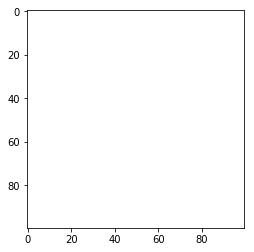

In [62]:
ani = parabolic_motion_ball(5, 5, 20, 10)
ita.plot.animation_show(ani)

## 空気抵抗の追加

- 速度に比例した空気抵抗が生じるとする
- 連立方程式が変更されるので `parabolic_m_step`を変更する

In [63]:
# x方向には力はかかっておらず、y軸負方向に重力で落下している
def parabolic_m_step(y, x, vel_y, vel_x, stride):
    g = 9.8
    k = 0.1 # 空気抵抗の係数
    y = y + vel_y * stride
    x = x + vel_x * stride
    vel_y = vel_y - g * stride - k * vel_y * stride
    vel_x = vel_x - k * vel_x * stride
    return [y, x, vel_y, vel_x]

テスト

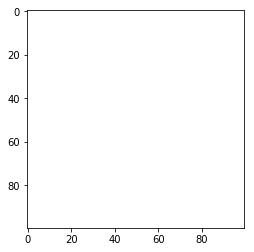

In [64]:
ani = parabolic_motion_ball(5, 5, 20, 10)
ita.plot.animation_show(ani)

### コードの改善

In [66]:
# 運動物体が自身の座標を更新する、と理解するのが自然
# obj = [y, x, vel_y, vel_x] （構造体として定義するとより簡潔にはなる）
def parabolic_m_step(obj, stride):
    g = 9.8
    k = 0.1 # 空気抵抗の係数
    y = obj[0] + obj[2] * stride
    x = obj[1] + obj[3] * stride
    vel_y = obj[2] - g * stride - k * vel_y * stride
    vel_x = obj[3] - k * obj[3] * stride
    new_obj = [y, x, vel_y, vel_x]
    return new_obj